# Quantum K-Nearest Neighbors

## Variable Descriptions

1. **test_states** -- $\{u_n\}$: Collection of vectors of unknown labels
2. Also
3. 

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates.swap import SwapGate
from numpy import pi

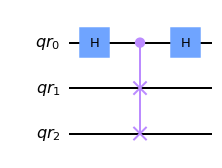

In [6]:
qreg_q = QuantumRegister(3, 'qr')
circuit = QuantumCircuit(qreg_q)

circuit.h(qreg_q[0])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])

circuit.draw(output="mpl")

In [33]:
W_state_preparation_oracle_circuit = QuantumCircuit(2)
W_oracle = W_state_preparation_oracle_circuit.to_gate()
W_oracle.name = "$W$"

In [37]:
V_state_preparation_oracle_circuit = QuantumCircuit(1)
V_oracle = V_state_preparation_oracle_circuit.to_gate()
V_oracle.name = "$V$"

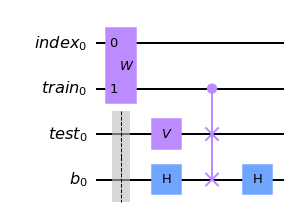

In [43]:
index_register = QuantumRegister(1, 'index')
train_register = QuantumRegister(1, 'train')
test_register = QuantumRegister(1, 'test')
B_register = QuantumRegister(1, 'b')
qc = QuantumCircuit(index_register, train_register, test_register, B_register)

qc.append(W_oracle, [index_register[0],train_register[0]])

qc.barrier(test_register[0], B_register[0])
qc.append(V_oracle, [test_register[0]])
qc.h(B_register[0])
qc.cswap(train_register[0], test_register[0], B_register[0])
qc.h(B_register[0])

qc.draw(output="mpl")

#U = qc.to_gate()
#U.name = "$U$"
#return U

In [18]:
n = 3
m = 3
grover_circuit = QuantumCircuit(4)
grover_circuit.append(one_to_four_unitary_gate, [0,1,2,3])
grover_circuit.measure_all()
grover_circuit.draw(output="mpl")

TypeError: issubclass() arg 1 must be a class

------------------------------
------------------------------

In [7]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [8]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [10]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

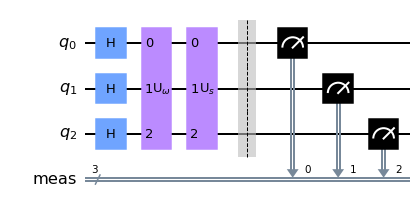

In [12]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw(output="mpl")
